In [147]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [211]:
class Grid:
    def __init__(self,xDim,yDim):
        self.xDim = xDim
        self.yDim = yDim
        self.states = [(x,y) for x in range(xDim) for y in range(yDim)]
        self.stateValues = {}
        self.actions = ["left","right","up","down"]
        self.rewards = {"terminal":0,"nonTerminal":-1}
        self.terminalStates = [(0,0),(self.xDim-1,self.yDim-1)]

    def startStateValues(self):
        for state in self.states:
                if state == (0,0) or state == (self.xDim-1,self.yDim-1):
                    self.stateValues[state] = 0
                else:   
                    self.stateValues[state] = random.random()

    def calcRewardState_probability_basedOn_stateAction(self,newState,reward,state,action):
        if newState in self.terminalStates or (newState not in self.terminalStates and reward == 0):
            return 0
        if newState != self.simulateAction(state,action):
            return 0
        return 1
        
    def simulateAction(self, state, action):
        state = list(state)
        if action == "up":
            state[1] -= 1 if state[1] > 0 else 0
        elif action == "down":
            state[1] += 1 if state[1] < self.yDim - 1 else 0
        elif action == "right":
            state[0] += 1 if state[0] < self.xDim - 1 else 0
        elif action == "left":
            state[0] -= 1 if state[0] > 0 else 0
        return tuple(state)
 
    def updateStateValue(self,state,gamma):
        if state in self.terminalStates:
            return 0
        stateValue = 0
        for action in self.actions:
            p_a_s = 1/len(self.actions)
            value = 0
            for newState in self.states:
                for reward in self.rewards.values():
                    value += self.calcRewardState_probability_basedOn_stateAction(newState,reward,state,action)*(reward+gamma*self.stateValues[newState])
            stateValue += p_a_s*value
        self.stateValues[state] = stateValue
        return stateValue

    def updateAllStateValues(self,gamma):
        for state in self.states:
            self.updateStateValue(state,gamma)

    def getArray(self):
        data_array = np.zeros((self.yDim, self.xDim))
        for (x, y), value in self.stateValues.items():
            data_array[y, x] = value
        return data_array
    
class Agent():
    def __init__(self,grid):
        self.grid = grid
        self.pos = (0,0)
        while self.pos in self.grid.terminalStates:
            self.pos = random.choice(grid.states)
    
    def findNextPosition(self):
        nextStateValue = float("-inf")
        nextState = None
        for action in self.grid.actions:
            if self.grid.stateValues[self.grid.simulateAction(self.pos,action)] > nextStateValue:
                nextState = self.grid.simulateAction(self.pos,action)
                nextStateValue = self.grid.stateValues[self.grid.simulateAction(self.pos,action)]
        return nextState

In [205]:
std_reward = -1
gamma = 1

grid = Grid(10,10)
grid.startStateValues()
for _ in range(500):
    grid.updateAllStateValues(gamma)
print(grid.stateValues)

{(0, 0): 0, (0, 1): -95.37638247880447, (0, 2): -150.95237178378005, (0, 3): -186.4449833850691, (0, 4): -210.30299226204903, (0, 5): -226.58897312086845, (0, 6): -237.579404463701, (0, 7): -244.71209197478896, (0, 8): -248.9504317352404, (0, 9): -250.91463424616194, (1, 0): -95.3763824788058, (1, 1): -132.2298166902888, (1, 2): -167.10662028607743, (1, 3): -194.16287614737018, (1, 4): -213.96703883218007, (1, 5): -227.98261469243175, (1, 6): -237.53934150543887, (1, 7): -243.71124402664972, (1, 8): -247.33083788094507, (1, 9): -248.9856445004102, (2, 0): -150.95237178378378, (2, 1): -167.10662028607982, (2, 2): -187.13478303260064, (2, 3): -205.1916200034853, (2, 4): -219.48249511303231, (2, 5): -229.90081251067147, (2, 6): -236.95172439188315, (2, 7): -241.33148420926645, (2, 8): -243.74539745016767, (2, 9): -244.78097386753046, (3, 0): -186.44498338507606, (3, 1): -194.16287614737567, (3, 2): -205.19162000348837, (3, 3): -216.04715521677372, (3, 4): -224.9340208773981, (3, 5): -231.

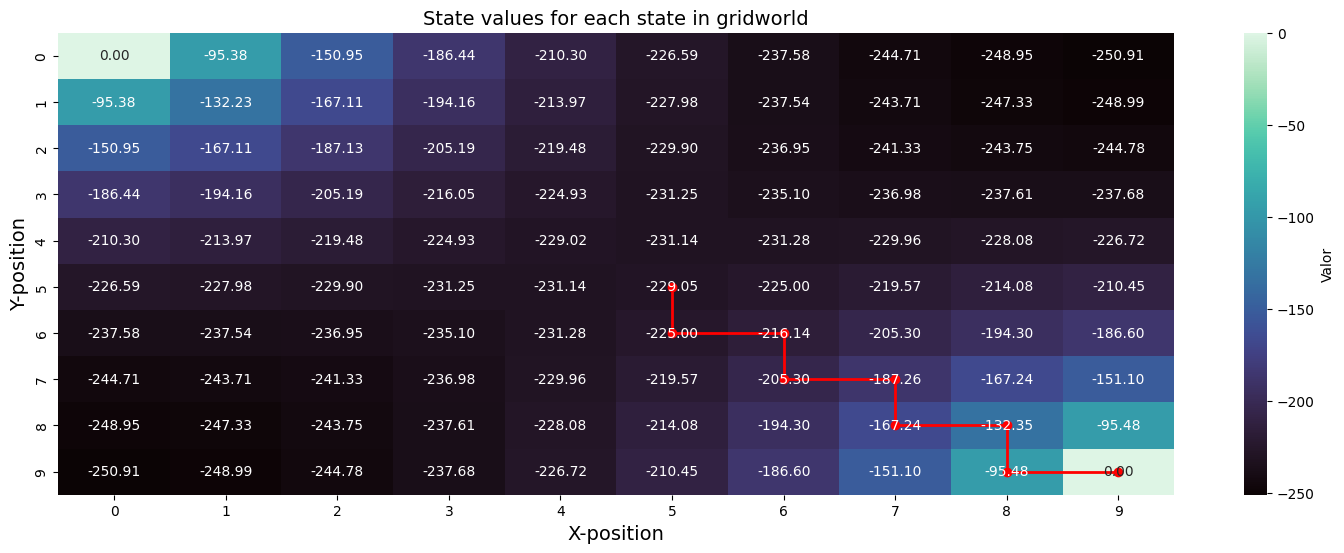

In [217]:
plt.figure(figsize=(18, 6))
sns.heatmap(grid.getArray(), cmap='mako', annot=True, fmt='.2f', cbar_kws={'label': 'Valor'})
plt.title('State values for each state in gridworld',fontsize = 14)
plt.xlabel('X-position',fontsize = 14)
plt.ylabel('Y-position',fontsize = 14)
plt.plot(xcoords, ycoords, color='red', linewidth=2, marker='o')

In [216]:
agent = Agent(grid)
xcoords = [agent.pos[0]+0.5]
ycoords = [agent.pos[1]+0.5]
while agent.pos not in agent.grid.terminalStates:
    newState = agent.findNextPosition()
    agent.pos = newState
    xcoords.append(agent.pos[0]+0.5)
    ycoords.append(agent.pos[1]+0.5)